##Question 1: XOR Gate Classification

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# XOR gate truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Single Layer Perceptron
class SLP:
    def __init__(self, input_size):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    def activation(self, x):
        return 1 if x > 0 else 0

    def predict(self, inputs):
        sum = np.dot(inputs, self.weights) + self.bias
        return self.activation(sum)

    def train(self, X, y, epochs=1000, learning_rate=0.1):
        for _ in range(epochs):
            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                error = target - prediction
                self.weights += learning_rate * error * inputs
                self.bias += learning_rate * error

# Train and test single layer perceptron
slp = SLP(2)
slp.train(X, y)

print("Single layer perceptron results:")
for inputs in X:
    print(f"Input: {inputs}, Prediction: {slp.predict(inputs)}")




Single layer perceptron results:
Input: [0 0], Prediction: 1
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 0


The Single perceptron layer neural network is not able to classify the output properly because for every input where 1 comes in XOR the outpuit is also 1 and when they are same the output is 0.This is very complex and cannote be classified by a single layer perceptron.Also they are not linearly seperable that means they cannot be seperated into two different classes with a straight line. Inorder for them to be correctly classified we need to use multi-layer perceptron which is used for non-linearly seperable classes.

In [8]:
# Multi-Layer Perceptron
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = np.random.rand(input_size, hidden_size)
        self.b1 = np.random.rand(hidden_size)
        self.w2 = np.random.rand(hidden_size, output_size)
        self.b2 = np.random.rand(output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        self.error = y - output
        self.delta2 = self.error * self.sigmoid_derivative(output)
        self.error_hidden = np.dot(self.delta2, self.w2.T)
        self.delta1 = self.error_hidden * self.sigmoid_derivative(self.a1)

        self.w2 += np.dot(self.a1.T, self.delta2)
        self.b2 += np.sum(self.delta2, axis=0)
        self.w1 += np.dot(X.T, self.delta1)
        self.b1 += np.sum(self.delta1, axis=0)

    def train(self, X, y, epochs=10000):
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        return self.forward(X)

# Train and test MLP
mlp = MLP(2, 2, 1)
mlp.train(X, y.reshape(-1, 1))

print("\nMLP Results:")
for inputs in X:
    prediction = mlp.predict(inputs.reshape(1, -1))
    print(f"Input: {inputs}, Prediction: {prediction[0][0]:.4f}")



MLP Results:
Input: [0 0], Prediction: 0.0131
Input: [0 1], Prediction: 0.9888
Input: [1 0], Prediction: 0.9888
Input: [1 1], Prediction: 0.0115


Here the output is almost the same as desired output.Only a minute error is there. If we increase the number of hidden layers the accuracy will also increase.

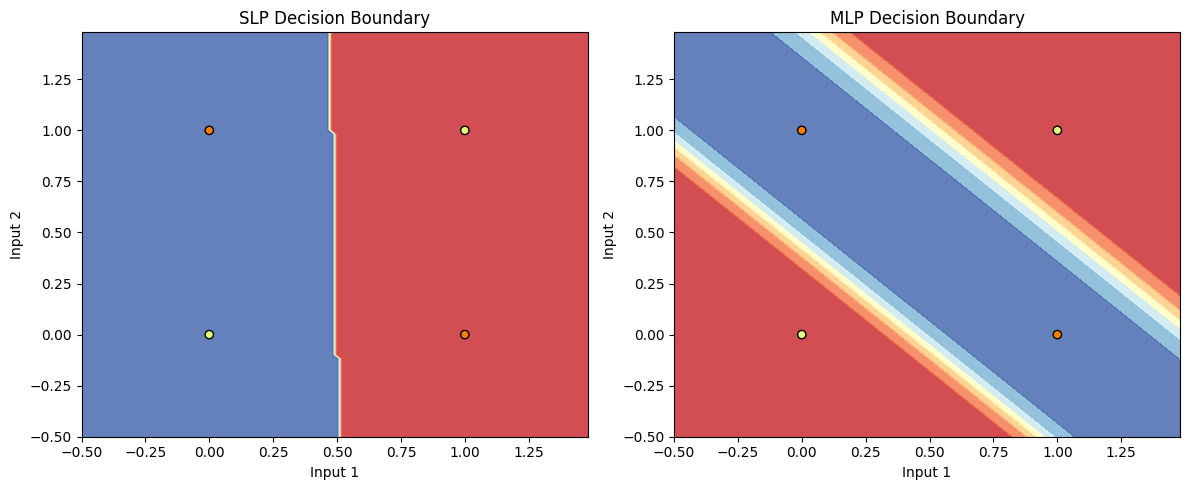

In [34]:
# Visualization function
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = np.array([model.predict(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Wistia, edgecolor='black')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title('Decision Boundary')

# Plot decision boundaries
plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_decision_boundary(slp, X, y)
plt.title('SLP Decision Boundary')
plt.subplot(122)
plot_decision_boundary(mlp, X, y)
plt.title('MLP Decision Boundary')
plt.tight_layout()
plt.show()

##Question 2: B. Sentiment Analysis Using ANN on IMDb Movie Reviews

Original dataset shape: (50000, 2)
Trimmed dataset shape: (1000, 2)
                                              review sentiment
0  I was looking forward to seeing Bruce Willis i...  negative
1  Bugs Bunny accidentally ends up at the South P...  negative
2  I find it difficult to comprehend what makes v...  negative
3  It's been said several times - not least by me...  negative
4  New rule. Nobody is allowed to make any more Z...  negative
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None
sentiment
negative    0.5
positive    0.5
Name: proportion, dtype: float64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4966 - loss: 0.8945 - val_accuracy: 0.6125 - val_loss: 0.7043
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6712 - loss: 0.5941 - val_accuracy: 0.6938 - val_loss: 0.6407
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7594 - loss: 0.4808 - val_accuracy: 0.6938 - val_loss: 0.6130
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8716 - loss: 0.3612 - val_accuracy: 0.7250 - val_loss: 0.5841
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9118 - loss: 0.2250 - val_accuracy: 0.7312 - val_loss: 0.5628
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9425 - loss: 0.1610 - val_accuracy: 0.7375 - val_loss: 0.5359
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9677 - loss: 0.1068 - val_accuracy: 0.7375 - val_loss: 0.5336
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9736 - loss: 0.0877 - val_accuracy: 0.7375 - v

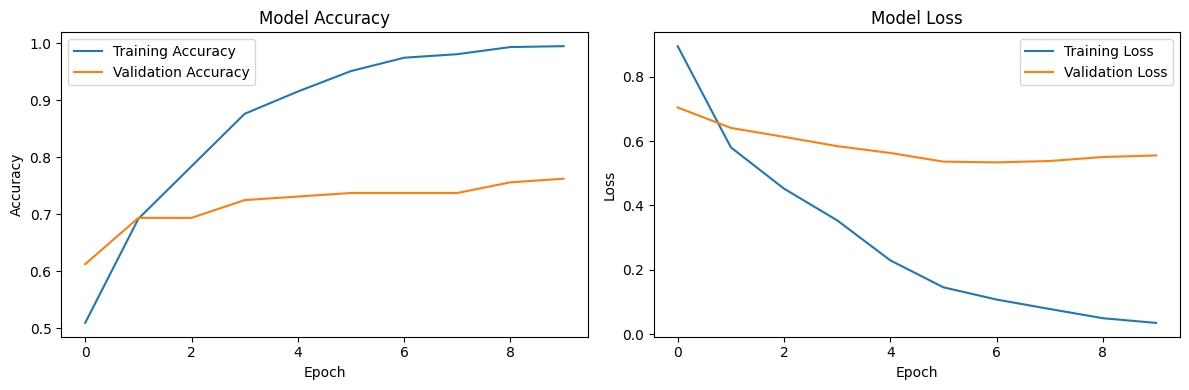

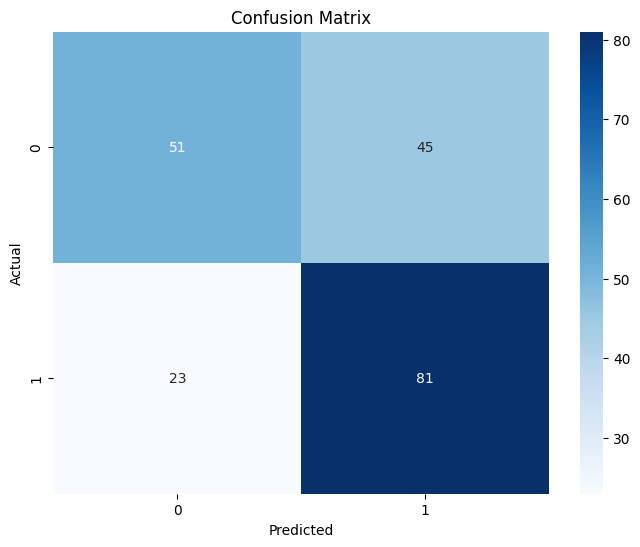

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('IMDB.csv')

# Trim the dataset
n_samples = 1000
df_trimmed = df.groupby('sentiment').apply(lambda x: x.sample(n=n_samples//2, random_state=42)).reset_index(drop=True)

print("Original dataset shape:", df.shape)
print("Trimmed dataset shape:", df_trimmed.shape)

# Display the first few rows and basic information about the trimmed dataset
print(df_trimmed.head())
print(df_trimmed.info())

# Check class distribution
print(df_trimmed['sentiment'].value_counts(normalize=True))

# Preprocessing
# Convert sentiments to binary (0 for negative, 1 for positive)
df_trimmed['sentiment'] = (df_trimmed['sentiment'] == 'positive').astype(int)

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_trimmed['review']).toarray()
y = df_trimmed['sentiment'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Make predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()





1. The model performs better at identifying positive reviews (higher recall for class 1) but is more precise when identifying negative reviews.

2. There's a class imbalance in the test set (96 negative vs 104 positive), but it's relatively minor.

3. The overall accuracy of 66% indicates that the model performs better than random guessing (50% for binary classification)

4. The model shows a bias towards predicting positive sentiment, as evidenced by the higher recall for positive reviews and higher precision for negative reviews.

5. The F1-scores (0.60 for negative, 0.70 for positive) suggest that the model's performance is moderate, with better performance on positive reviews.





##1.Justify the use of the ReLU and sigmoid activation functions.

## ReLU (Rectified Linear Unit) Activation Function

ReLU is used in the hidden layers of our neural network. Here's why it's a good choice:

1. **Non-linearity**: ReLU introduces non-linearity into the network, allowing it to learn complex patterns. This is crucial for sentiment analysis, where the relationship between words and sentiment is often non-linear.

2. **Mitigation of the Vanishing Gradient Problem**: Unlike sigmoid or tanh functions, ReLU doesn't squash its input in the positive region, which helps to mitigate the vanishing gradient problem during backpropagation. This is particularly important for deeper networks.


## Sigmoid Activation Function

Sigmoid is used in the output layer of our network. Here's why it's appropriate for this task:

1. **Output Range**: Sigmoid squashes its input to a range between 0 and 1. This is perfect for binary classification tasks like sentiment analysis, where we want to output a probability of positive sentiment.

2. **Smooth Gradient**: Sigmoid has a smooth gradient, which is beneficial for learning. It provides a clear direction for weight updates during backpropagation.


##2.Explain why binary cross-entropy is suitable for this task.
Binary cross-entropy is used as the loss function for our sentiment analysis task. Here's why it's suitable:

1. **Binary Classification**: Our task is binary classification (positive or negative sentiment), and binary cross-entropy is specifically designed for such tasks.

2. **Probabilistic Interpretation**: Binary cross-entropy measures the performance of a classification model whose output is a probability value between 0 and 1. This aligns perfectly with our sigmoid output.

3. **Penalizes Confident Misclassifications**: Binary cross-entropy heavily penalizes predictions that are both confident and wrong. For sentiment analysis, this is desirable as we want to strongly discourage the model from being confidently incorrect about a review's sentiment.

4. **Proper Scoring Rule**: Binary cross-entropy is a proper scoring rule, meaning it incentivizes the model to produce well-calibrated probabilities.

By using ReLU in the hidden layers, sigmoid in the output layer, and binary cross-entropy as the loss function, we create a neural network architecture that is well-suited for the complexities of sentiment analysis